In [1]:
import os
import h5py
import numpy as np
from torchdeepretina.datas import loadexpt, _loadexpt_h5

In [2]:
data_path = os.path.join('/home/salamander/experiments/data/')

In [14]:
import torch
from collections import deque

In [20]:
def get_hs(model, batch_size, device):
    hs = []
    hs.append(torch.zeros(batch_size, *model.h_shapes[0]).to(device))
    hs[0][:,0] = 1
    hs.append(deque([],maxlen=model.seq_len))
    for i in range(model.seq_len):
        hs[1].append(torch.zeros(batch_size, *model.h_shapes[1]).to(device))
    return hs

In [4]:
hs = get_hs(model, 5)

In [21]:
from torch.utils.data.sampler import Sampler
class BatchRnnSampler(Sampler):
    
    def __init__(self, length, batch_size, seq_len):
        self.length = length
        self.batch_size = batch_size
        self.seq_len = seq_len

    def __iter__(self):
        batch_idx = 0
        count = 0
        while batch_idx < self.length // self.batch_size:
            batch = [batch_idx + n * self.__len__() for n in range(self.batch_size)]
            yield batch
            batch_idx += 1
            count += 1
            if count == self.seq_len:
                count = 0
                batch_idx -= (self.seq_len - 1)

    def __len__(self):
        return (self.length // self.batch_size - self.seq_len + 1) * self.seq_len + self.seq_len -1

In [23]:
len(BatchRnnSampler(length=30, batch_size=3, seq_len=5))

34

In [20]:
len(BatchRnnSampler(length=30, batch_size=3, seq_len=5))

10

In [23]:
data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'train', 40, 0, data_path=data_path)

In [24]:
data.X.shape

(359762, 40, 50, 50)

In [26]:
data.y.shape

(359762, 5)

In [15]:
from kinetic.data import BatchRnnSampler, TrainDataset, ValidationDataset
dataset = TrainDataset(data_path)

In [16]:
from torch.utils.data.dataloader import DataLoader
batch_sampler = BatchRnnSampler(length=len(dataset), batch_size=512, seq_len=8)
data = DataLoader(dataset=dataset, batch_sampler=batch_sampler)

In [19]:
len(batch_sampler)

644

In [8]:
for i,(x,y) in enumerate(data):
    if i == 0:
        inpt = x
        trgt = y
        break

In [9]:
inpt.shape

torch.Size([512, 40, 50, 50])

In [ ]:
dataset

In [8]:
from scipy.stats import pearsonr
device = torch.device('cuda:1')
hs = get_hs(model, 1, device)
model = model.to(device)
model.eval()
with torch.no_grad():
    pearsons = []
    val_pred = []
    val_targ = []
    for x,y in data:
        x = x.to(device)
        out, hs = model(x, hs)
        val_pred.append(out.detach().cpu().numpy().squeeze())
        val_targ.append(y.detach().numpy().squeeze())
    val_pred = np.stack(val_pred, axis=0)
    val_targ = np.stack(val_targ, axis=0)
    for cell in range(5):
        pearsons.append(pearsonr(val_pred[:,cell],val_targ[:,cell])[0])
    print(np.array(pearsons).mean())

-0.0035025242913605073


In [10]:
val_targ.shape

(30000, 5)

In [3]:
data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'train',
                40, 0, data_path=data_path)

In [18]:
X = data.X
batch_size = 512
length = X.shape[0]//batch_size
tot_len = length*batch_size
X_trunc = X[:tot_len].reshape(batch_size, length, *X.shape[1:])
X_trunc = np.transpose(X_trunc, (1,0,2,3,4))
y = data.y
batch_size = 512
length = y.shape[0]//batch_size
tot_len = length*batch_size
y_trunc = y[:tot_len].reshape(batch_size, length, *y.shape[1:])
y_trunc = np.transpose(y_trunc, (1,0,2))

In [19]:
y_trunc.shape

(702, 512, 5)

In [4]:
device = torch.device('cuda:1')

In [5]:
print(device)

cuda:1


In [4]:
import torch.nn as nn
import torch
nn.Parameter(torch.ones((5,2)).float(), requires_grad=True)

Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [46]:
import sys
sys.path.insert(0, './kinetic')
from kinetic.models import KineticsChannelModel
from kinetic.evaluation import pearsonr_eval
from  torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
import torch
device = torch.device('cuda:1')
model = KineticsChannelModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
checkpoint_path = '/home/xhding/saved_model/channel/epoch_45_loss_-3.0704265886546778_pearson_0.41805463828607137.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)

In [3]:
model.state_dict().keys()

odict_keys(['bipolar.0.convs.0.weight', 'bipolar.0.convs.1.weight', 'bipolar.0.convs.2.weight', 'bipolar.0.convs.3.weight', 'bipolar.0.convs.4.weight', 'bipolar.0.convs.5.weight', 'bipolar.0.convs.6.weight', 'bipolar.0.convs.6.bias', 'bipolar.2.weight', 'bipolar.2.bias', 'bipolar.3.sigma', 'bipolar.6.multiplier', 'kinetics.ka', 'kinetics.kfi', 'kinetics.kfr', 'kinetics.ksi', 'kinetics.ksr', 'kinet_scale.scale_param', 'kinet_scale.shift_param', 'amacrine.1.convs.0.weight', 'amacrine.1.convs.1.weight', 'amacrine.1.convs.2.weight', 'amacrine.1.convs.3.weight', 'amacrine.1.convs.4.weight', 'amacrine.1.convs.4.bias', 'amacrine.3.weight', 'amacrine.3.bias', 'amacrine.4.sigma', 'ganglion.0.weight', 'ganglion.0.bias', 'ganglion.1.weight', 'ganglion.1.bias'])

In [47]:
checkpoint['model_state_dict'].keys()

odict_keys(['bipolar.0.convs.0.weight', 'bipolar.0.convs.1.weight', 'bipolar.0.convs.2.weight', 'bipolar.0.convs.3.weight', 'bipolar.0.convs.4.weight', 'bipolar.0.convs.5.weight', 'bipolar.0.convs.6.weight', 'bipolar.0.convs.6.bias', 'bipolar.2.weight', 'bipolar.2.bias', 'bipolar.2.running_mean', 'bipolar.2.running_var', 'bipolar.2.num_batches_tracked', 'bipolar.3.sigma', 'bipolar.6.multiplier', 'kinetics.ka', 'kinetics.kfi', 'kinetics.kfr', 'kinetics.ksi', 'kinetics.ksr', 'kinet_scale.scale_param', 'kinet_scale.shift_param', 'amacrine.1.convs.0.weight', 'amacrine.1.convs.1.weight', 'amacrine.1.convs.2.weight', 'amacrine.1.convs.3.weight', 'amacrine.1.convs.4.weight', 'amacrine.1.convs.4.bias', 'amacrine.3.weight', 'amacrine.3.bias', 'amacrine.3.running_mean', 'amacrine.3.running_var', 'amacrine.3.num_batches_tracked', 'amacrine.4.sigma', 'ganglion.0.weight', 'ganglion.0.bias', 'ganglion.1.weight', 'ganglion.1.bias', 'ganglion.1.running_mean', 'ganglion.1.running_var', 'ganglion.1.num_

In [54]:
checkpoint['model_state_dict']['bipolar.6.multiplier'].data

tensor([0.1000], device='cuda:1')

In [7]:
class ValidationDataset(Dataset):
    
    def __init__(self, data_path):
        super().__init__()
        data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'train',
                        40, 0, data_path=data_path)
        val_size = 30000
        self.X = data.X[-val_size:]
        self.y = data.y[-val_size:]
        self.centers = data.centers
        self.stats = data.stats
        
    def __len__(self):
        return self.y.shape[0]
    
    def __getitem__(self, index):
        inpt = torch.from_numpy(self.X[index])
        trgt = torch.from_numpy(self.y[index])
        return (inpt, trgt)
    

In [13]:
validation_data =  DataLoader(ValidationDataset(data_path))
pearson = pearsonr_eval(model, validation_data, 5, device)

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 10368])

In [18]:
pearson

0.3579518903352822

In [3]:
from kinetic.data import BatchRnnSampler
list(BatchRnnSampler(500, 50, 8))

[[0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200,
  210,
  220,
  230,
  240,
  250,
  260,
  270,
  280,
  290,
  300,
  310,
  320,
  330,
  340,
  350,
  360,
  370,
  380,
  390,
  400,
  410,
  420,
  430,
  440,
  450,
  460,
  470,
  480,
  490],
 [1,
  11,
  21,
  31,
  41,
  51,
  61,
  71,
  81,
  91,
  101,
  111,
  121,
  131,
  141,
  151,
  161,
  171,
  181,
  191,
  201,
  211,
  221,
  231,
  241,
  251,
  261,
  271,
  281,
  291,
  301,
  311,
  321,
  331,
  341,
  351,
  361,
  371,
  381,
  391,
  401,
  411,
  421,
  431,
  441,
  451,
  461,
  471,
  481,
  491],
 [2,
  12,
  22,
  32,
  42,
  52,
  62,
  72,
  82,
  92,
  102,
  112,
  122,
  132,
  142,
  152,
  162,
  172,
  182,
  192,
  202,
  212,
  222,
  232,
  242,
  252,
  262,
  272,
  282,
  292,
  302,
  312,
  322,
  332,
  342,
  352,
  362,
  372,
  382,
  392,
  402,
  412,
  422,
  432,
  442,
  452,
  462,
  

In [3]:
import matplotlib.pyplot as plt
import numpy as np

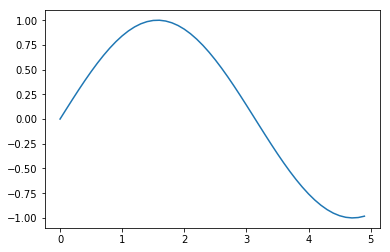

In [6]:
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [44]:
import sys
sys.path.insert(0, './kinetic')
from kinetic.models import KineticsChannelModel
from kinetic.evaluation import pearsonr_eval
from  torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
import torch
device = torch.device('cuda:0')
model = KineticsChannelModel().to(device)
#checkpoint_path = '/home/xhding/saved_model/channel2/epoch_005_loss_-3.28_pearson_-0.0079.pth'
checkpoint_path = '/home/xhding/saved_model/channel/epoch_080_loss_-3.33_pearson_0.4375.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [12]:
class ValidationDataset(Dataset):
    
    def __init__(self, data_path):
        super().__init__()
        data = loadexpt('15-10-07', [0,1,2,3,4], 'naturalscene', 'train',
                        50, 0, data_path=data_path)
        val_size = 30000
        self.X = data.X[-val_size:]
        self.y = data.y[-val_size:]
        self.centers = data.centers
        self.stats = data.stats
        
    def __len__(self):
        return self.y.shape[0]
    
    def __getitem__(self, index):
        inpt = torch.from_numpy(self.X[index])
        trgt = torch.from_numpy(self.y[index])
        return (inpt, trgt)
validation_data =  DataLoader(ValidationDataset(data_path), batch_size=512)

In [5]:
def pearsonr_eval(model, data, n_units, device):
    hs = get_hs(model, 1, device)
    model = model.to(device)
    model.eval()
    with torch.no_grad():
        pearsons = []
        val_pred = []
        val_targ = []
        for x,y in data:
            x = x.to(device)
            out, hs = model(x, hs)
            val_pred.append(out.detach().cpu().numpy().squeeze())
            val_targ.append(y.detach().numpy().squeeze())
        val_pred = np.stack(val_pred, axis=0)
        val_targ = np.stack(val_targ, axis=0)
        for cell in range(n_units):
            pearsons.append(pearsonr(val_pred[:,cell],val_targ[:,cell])[0])
        model.train()
        return np.array(pearsons).mean(), val_pred, val_targ

In [47]:
from scipy.stats import pearsonr
pc, pred, targ = pearsonr_eval(model, validation_data, 5, device)

In [48]:
pc

0.42175988449800955

In [37]:
checkpoint['model_state_dict'].keys()

odict_keys(['bipolar.0.convs.0.weight', 'bipolar.0.convs.1.weight', 'bipolar.0.convs.2.weight', 'bipolar.0.convs.3.weight', 'bipolar.0.convs.4.weight', 'bipolar.0.convs.5.weight', 'bipolar.0.convs.6.weight', 'bipolar.0.convs.6.bias', 'bipolar.2.weight', 'bipolar.2.bias', 'bipolar.5.multiplier', 'kinetics.ka', 'kinetics.kfi', 'kinetics.kfr', 'kinetics.ksi', 'kinetics.ksr', 'kinet_scale.scale_param', 'kinet_scale.shift_param', 'amacrine.1.convs.0.weight', 'amacrine.1.convs.1.weight', 'amacrine.1.convs.2.weight', 'amacrine.1.convs.3.weight', 'amacrine.1.convs.4.weight', 'amacrine.1.convs.4.bias', 'amacrine.3.weight', 'amacrine.3.bias', 'ganglion.0.weight', 'ganglion.0.bias', 'ganglion.1.weight', 'ganglion.1.bias'])

In [43]:
checkpoint['model_state_dict']['amacrine.3.bias']

tensor([-3.5569e-04, -1.2885e-13, -3.9355e-03,  ...,  5.8120e-02,
         7.9140e-02,  3.7187e-02], device='cuda:0')

In [49]:
pred[11000:11100,3]

array([ 1.348986  ,  1.4387271 ,  1.5289254 ,  1.6403759 ,  1.7801998 ,
        1.931041  ,  2.06931   ,  2.1698706 ,  2.2228231 ,  2.2493289 ,
        2.2093933 ,  2.1253173 ,  2.003521  ,  1.8392639 ,  1.6101074 ,
        1.2906842 ,  1.0333914 ,  0.8218001 ,  0.6648578 ,  0.6494985 ,
        0.69522697,  0.80693376,  0.99657655,  1.2136891 ,  1.4331626 ,
        1.564425  ,  1.519738  ,  1.4605511 ,  1.4233972 ,  1.3934128 ,
        1.3643755 ,  1.4039971 ,  1.4658694 ,  1.5167211 ,  1.3853804 ,
        1.1601368 ,  0.95271003,  0.8729989 ,  1.1541355 ,  2.1227472 ,
        4.046956  ,  6.966586  , 10.09161   , 12.777767  , 14.572852  ,
       15.041913  , 14.714552  , 13.488459  , 11.762767  ,  9.585559  ,
        7.9264317 ,  6.866749  ,  6.4408035 ,  5.993018  ,  5.6431293 ,
        5.1263437 ,  4.6907825 ,  3.9479897 ,  3.092077  ,  2.2794445 ,
        1.7888294 ,  1.7335874 ,  2.0521245 ,  2.6588929 ,  3.636105  ,
        4.4381022 ,  4.935599  ,  5.096521  ,  5.180359  ,  5.30

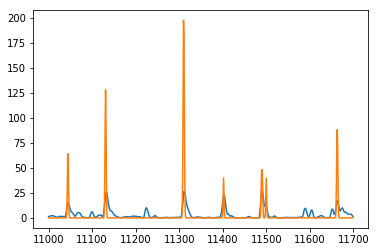

In [55]:
import matplotlib.pyplot as plt
plt.plot(np.arange(11000,11700),pred[11000:11700,3])
plt.plot(np.arange(11000,11700),targ[11000:11700,3])

In [50]:
targ[11000:11100,3]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.48672163e-04,
       1.35832712e-02, 4.59183041e-01, 5.87606360e+00, 2.97204717e+01,
       6.41839805e+01, 6.39513574e+01, 2.93843360e+01, 5.75986672e+00,
       4.45991405e-01, 1.29273006e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [44]:
def eval_loss(pred, targ, device):
    batch_size = 512
    loss_fn = nn.PoissonNLLLoss(log_input=False, reduction='sum').to(device)
    loss = 0
    n_batch = pred.shape[0] // batch_size
    pred = torch.from_numpy(pred)
    targ = torch.from_numpy(targ)
    with torch.no_grad():
        for idx in range(n_batch):
            loss += loss_fn(pred[batch_size*idx:batch_size*(idx+1)].to(device), 
                            targ[batch_size*idx:batch_size*(idx+1)].to(device))
    loss /= pred.shape[0]
    return loss

In [45]:
import torch.nn as nn
eval_loss(pred, targ, device)

tensor(-10.3883, device='cuda:0', dtype=torch.float64)

In [33]:
pred.shape

(30000, 5)

In [3]:
import sys
sys.path.insert(0, './fnn')
from fnn.models import BNCNN_3D2_Stack
from fnn.evaluation import pearsonr_eval
from  torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
import torch
device = torch.device('cuda:1')
model = BNCNN_3D2_Stack().to(device)
checkpoint_path = '/home/xhding/saved_model/3d_conv2_stack/epoch_045_loss_-5.25_pearson_0.4373_eval_loss_0.92.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

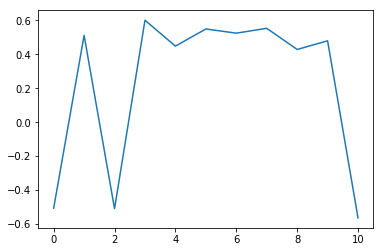

In [4]:
import matplotlib.pyplot as plt
import numpy as np
filter_w = checkpoint['model_state_dict']['ganglion.1.filter'].cpu().numpy().squeeze()
plt.plot(np.arange(filter_w.shape[0]), filter_w)

In [6]:
def pearsonr_batch_eval(model, data, n_units, device):
    model = model.to(device)
    model.eval()
    with torch.no_grad():
        pearsons = []
        val_pred = []
        val_targ = []
        for x,y in data:
            x = x.to(device)
            out = model(x)
            val_pred.append(out.detach().cpu().numpy())
            val_targ.append(y.detach().numpy())
        val_pred = np.concatenate(val_pred, axis=0)
        val_targ = np.concatenate(val_targ, axis=0)
        for cell in range(n_units):
            pearsons.append(pearsonr(val_pred[:,cell],val_targ[:,cell])[0])
        model.train()
        return np.array(pearsons).mean(), val_pred, val_targ

In [7]:
def pearsonr_batch_eval_cut_tail(model, data, n_units, device):
    model = model.to(device)
    model.eval()
    with torch.no_grad():
        pearsons = []
        val_pred = []
        val_targ = []
        for x,y in data:
            x[:, 0:-40] = 0.
            x = x.to(device)
            out = model(x)
            val_pred.append(out.detach().cpu().numpy())
            val_targ.append(y.detach().numpy())
        val_pred = np.concatenate(val_pred, axis=0)
        val_targ = np.concatenate(val_targ, axis=0)
        for cell in range(n_units):
            pearsons.append(pearsonr(val_pred[:,cell],val_targ[:,cell])[0])
        model.train()
        return np.array(pearsons).mean()

In [13]:
from scipy.stats import pearsonr
pc, pred, targ = pearsonr_batch_eval(model, validation_data, 5, device)
pc

0.4372953595290882

In [14]:
pc = pearsonr_batch_eval_cut_tail(model, validation_data, 5, device)
pc

0.4510679944842133

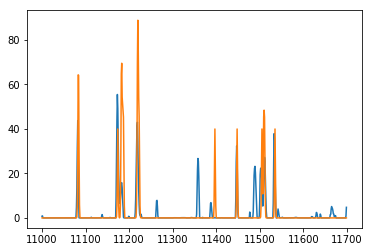

In [15]:
import matplotlib.pyplot as plt
plt.plot(np.arange(11000,11700),pred[11000:11700,3])
plt.plot(np.arange(11000,11700),targ[11000:11700,3])